In [170]:
import datetime
import pandas as pd
from pprint import pprint
from src.algorithms.strategy import CvarMretOpt, EqualyWeighted, MeanSemidevOpt, MeanVariance,StochasticDominance
# test data fetching
from src.datasource.yahoodata import YahooDataSource
from src.backtest.backtest import BackTest

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [171]:
tickers = ['MSFT','MMM', 'AXP', 'AMGN', 'AAPL', 'CSCO','IBM','NVDA','TSLA','AMZN','MRK']

column_name = 'Close'
interval = '1d'

start_date = datetime.datetime(2019,5,1)
end_date = datetime.datetime(2025,5,1)
main_data = YahooDataSource(tickers,start_date,end_date,columns=[column_name],interval=interval)
data = main_data.get_data()
main_data.get_data_by_frequency(start_date,end_date,'1d').ffill()

Adding MSFT to the data source
Getting data for MSFT
Adding MMM to the data source
Getting data for MMM
Adding AXP to the data source
Getting data for AXP
Adding AMGN to the data source
Getting data for AMGN
Adding AAPL to the data source
Getting data for AAPL
Adding CSCO to the data source
Getting data for CSCO
Adding IBM to the data source
Getting data for IBM
Adding NVDA to the data source
Getting data for NVDA
Adding TSLA to the data source
Getting data for TSLA
Adding AMZN to the data source
Getting data for AMZN
Adding MRK to the data source
Getting data for MRK


,MSFT,MMM,AXP,AMGN,AAPL,CSCO,IBM,NVDA,TSLA,AMZN,MRK
Date,,,,,,,,,,,
2019-05-02,119.228073,122.332680,108.088470,146.987610,50.034931,45.747585,100.746628,4.547152,16.273333,95.041000,63.263947
2019-05-03,121.769279,122.643921,110.024361,147.662155,50.656937,45.747585,101.222992,4.542685,17.002001,98.123001,63.645821
2019-05-04,121.769279,122.643921,110.024361,147.662155,50.656937,45.747585,101.222992,4.542685,17.002001,98.123001,63.645821
2019-05-05,121.769279,122.643921,110.024361,147.662155,50.656937,45.747585,101.222992,4.542685,17.002001,98.123001,63.645821
2019-05-06,121.060738,121.200455,110.015160,147.453979,49.874653,45.456135,101.316803,4.464247,17.022667,97.527496,63.232132
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-26,391.850006,137.320007,264.809998,280.839996,209.005920,56.709999,230.873657,111.010002,284.950012,188.990005,82.739998
2025-04-27,391.850006,137.320007,264.809998,280.839996,209.005920,56.709999,230.873657,111.010002,284.950012,188.990005,82.739998
2025-04-28,391.160004,137.929993,264.950012,283.089996,209.864792,56.840000,234.598862,108.730003,285.880005,187.699997,83.190002


In [178]:
meanSemidevOpt = MeanSemidevOpt(0.7)
minimumVariance = MeanVariance()
minCvar = CvarMretOpt(0.25,0.2)

Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              1.669359
Mean Daily Return         0.000602
Mean Yearly Retrun        0.163822
Mean Daily SP500 Return   0.000356
Mean Yearly SP500 Return  0.093740
Std Dev of Daily Return   0.011321
Downside Std Daily        0.010523
Sharpe Ratio              0.844401
Sortino Ratio             0.908433
Calmar Ratio              7.443643
Max Drawdown              0.224266
Alpha                     0.000267
Beta                      0.839900


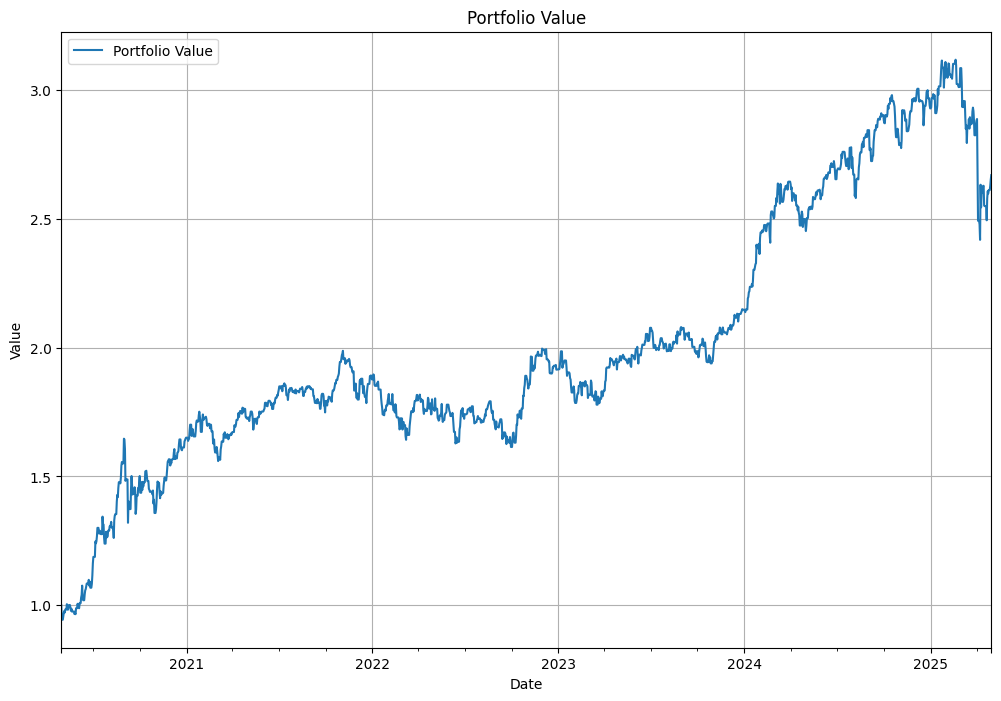

In [179]:

meanSemidevOpt_bt = BackTest(main_data, meanSemidevOpt)
meanSemidevOpt_bt.backtest(start_date, end_date, 365, 30, '1d')
meanSemidevOpt_bt.plot_portfolio_returns()
mean_semi_summary = meanSemidevOpt_bt.get_summary()
print(mean_semi_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              0.858377
Mean Daily Return         0.000385
Mean Yearly Retrun        0.101818
Mean Daily SP500 Return   0.000356
Mean Yearly SP500 Return  0.093740
Std Dev of Daily Return   0.009497
Downside Std Daily        0.008582
Sharpe Ratio              0.643275
Sortino Ratio             0.711859
Calmar Ratio              3.442068
Max Drawdown              0.249378
Alpha                     0.000041
Beta                      0.828962


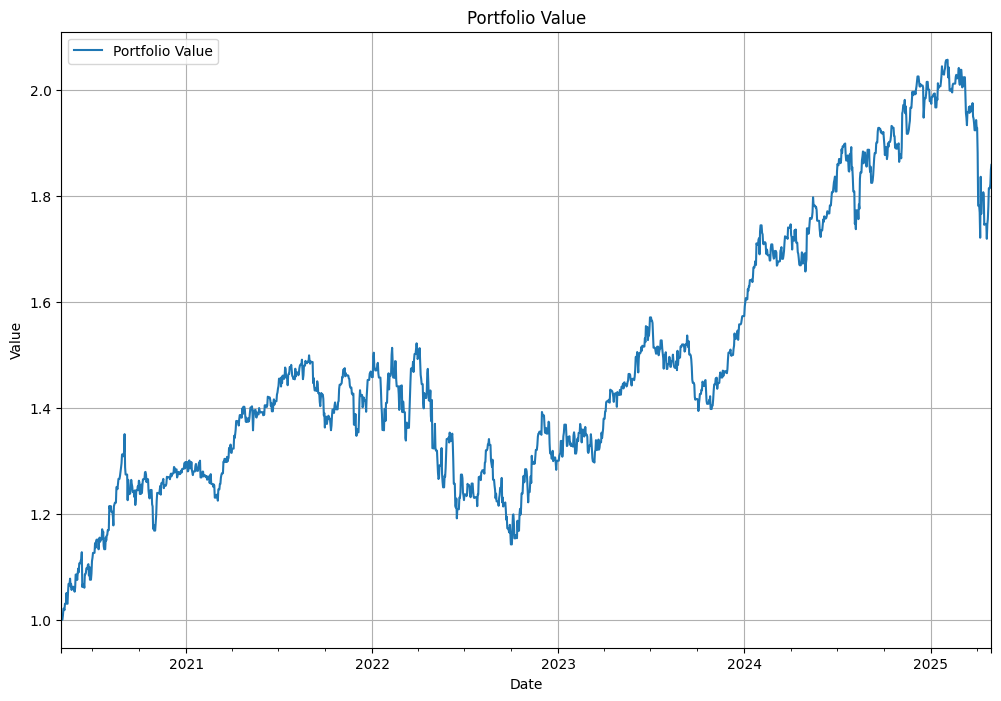

In [180]:
min_var_bt = BackTest(main_data, minimumVariance)
min_var_bt.backtest(start_date, end_date, 12, 1, '1MS')
min_var_bt.plot_portfolio_returns()
min_var_summary = min_var_bt.get_summary()
print(min_var_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              1.053331
Mean Daily Return         0.000445
Mean Yearly Retrun        0.118553
Mean Daily SP500 Return   0.000356
Mean Yearly SP500 Return  0.093740
Std Dev of Daily Return   0.010047
Downside Std Daily        0.009193
Sharpe Ratio              0.702620
Sortino Ratio             0.767909
Calmar Ratio              5.136275
Max Drawdown              0.205077
Alpha                     0.000132
Beta                      0.784081


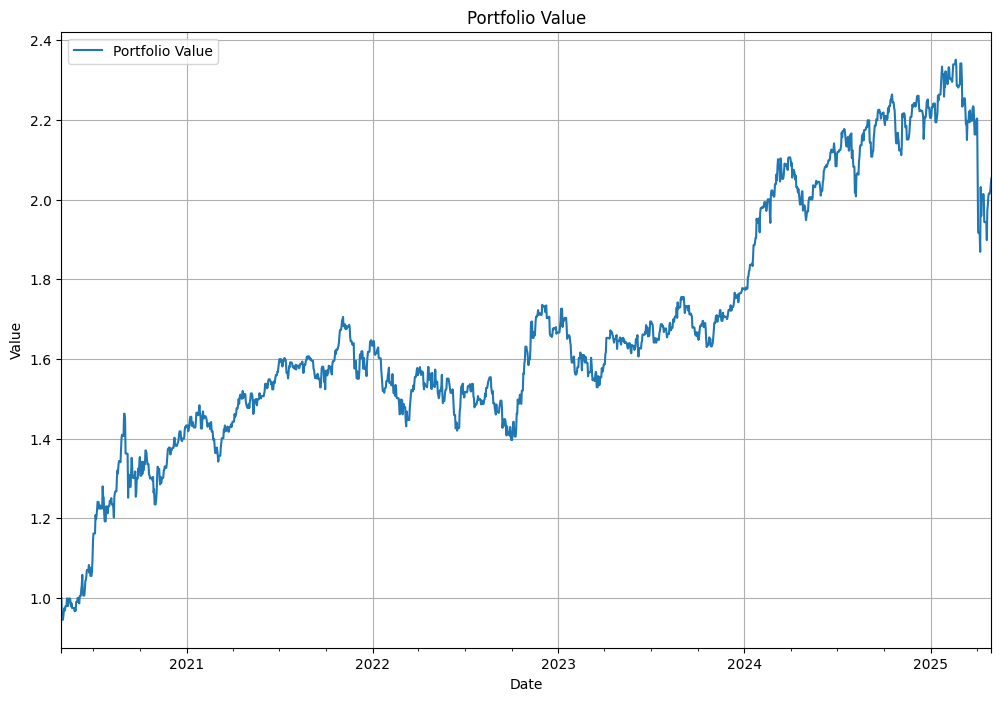

In [181]:
min_cvar_bt = BackTest(main_data, minCvar)
min_cvar_bt.backtest(start_date, end_date, 365, 30, '1d') 
min_cvar_bt.plot_portfolio_returns()
min_cvar_summary = min_cvar_bt.get_summary()
print(min_cvar_summary)

In [182]:
# Minimum CVaR vs Minimum Variance vs Mean Semideviation vs Equally weighted combined_summary
combined_summary = pd.concat([min_var_summary, min_cvar_summary, mean_semi_summary], axis=1)
combined_summary.columns = ['MinimumVariance', 'MinCvar', 'MeanSemidevOpt']
combined_summary

,MinimumVariance,MinCvar,MeanSemidevOpt
Metric,,,
Total Return,0.858377,1.053331,1.669359
Mean Daily Return,0.000385,0.000445,0.000602
Mean Yearly Retrun,0.101818,0.118553,0.163822
Mean Daily SP500 Return,0.000356,0.000356,0.000356
Mean Yearly SP500 Return,0.093740,0.093740,0.093740
Std Dev of Daily Return,0.009497,0.010047,0.011321
Downside Std Daily,0.008582,0.009193,0.010523
Sharpe Ratio,0.643275,0.702620,0.844401
Sortino Ratio,0.711859,0.767909,0.908433


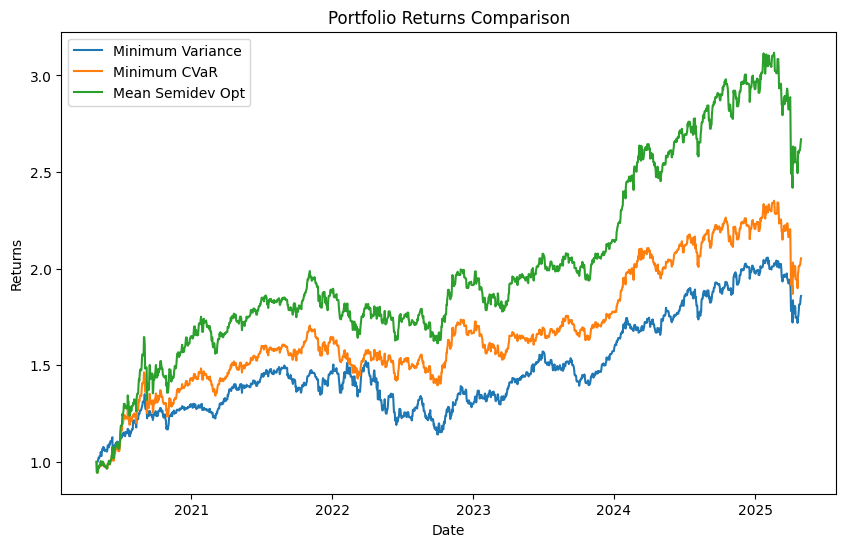

In [183]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(10, 6))
plt.plot(min_var_bt.portfolio_value, label='Minimum Variance')
plt.plot(min_cvar_bt.portfolio_value, label='Minimum CVaR')
plt.plot(meanSemidevOpt_bt.portfolio_value, label='Mean Semidev Opt')
plt.title('Portfolio Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Returns')

plt.legend()